<a href="https://colab.research.google.com/github/avalosjared/Project-3/blob/main/Project_2_CIS_2100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: using the soda csv file create a dataframe using pandas

import pandas as pd

# Assuming 'soda.csv' is in your current working directory
df = pd.read_csv('soda_customer_purchases.csv')

# Print the first few rows of the DataFrame to verify
print(df.head())


   Store ID  Order ID  Customer ID Customer Name                Items  \
0       585         1         2497         James   Coke, Mountain Dew   
1       585         2         1974      Isabella                Fanta   
2       585         3         1085     Charlotte  Mountain Dew, Fanta   
3       585         4          763          John               Sprite   
4       585         5         2958        Amelia         Mountain Dew   

         Prices Total Price                 Date  
0  $1.50, $1.30       $2.80  2024-01-02 13:41:07  
1         $1.20       $1.20  2023-09-05 21:36:35  
2  $1.30, $1.20       $2.50  2023-01-28 11:08:09  
3         $1.25       $1.25  2023-12-14 23:12:38  
4         $1.30       $1.30  2024-08-21 20:23:22  


In [ ]:
# prompt: using the Items list what is the most commonly bought Items

# Assuming 'soda.csv' is in your current working directory
# and the dataframe is already loaded as 'df'

# Group by 'Items' and count occurrences
item_counts = df.groupby('Items')['Items'].count()

# Find the most frequent item
most_common_item = item_counts.idxmax()

# Print the most common item and its count
print(f"The most commonly bought item is: {most_common_item}")
print(f"Count: {item_counts.max()}")

The most commonly bought item is: Coke
Count: 2125


In [ ]:
# prompt: how frequent was that customers were large buyers using items

import pandas as pd

# Assuming 'soda.csv' is in your current working directory
df = pd.read_csv('soda_customer_purchases.csv')

# Group by 'Customer' and 'Items' to count purchases per customer per item
customer_item_counts = df.groupby(['Customer ID', 'Items']).size().reset_index(name='PurchaseCount')

# Define a threshold for "large buyers" (e.g., purchased an item more than 3 times)
large_buyer_threshold = 3

# Filter for customers who are large buyers of any item
large_buyers = customer_item_counts[customer_item_counts['PurchaseCount'] > large_buyer_threshold]

# Group by 'Items' and count the number of large buyers for each item
large_buyer_item_counts = large_buyers.groupby('Items')['Customer ID'].count()


# Print the frequency of large buyers for each item
print("Frequency of large buyers for each item:")
print(large_buyer_item_counts)

# Find the item with the most large buyers
most_frequent_large_buyer_item = large_buyer_item_counts.idxmax()
print(f"\nThe item with the most large buyers is: {most_frequent_large_buyer_item}")
print(f"Number of large buyers for this item: {large_buyer_item_counts.max()}")

Frequency of large buyers for each item:
Items
Coke                           100
Coke, Fanta                     72
Coke, Fanta, Mountain Dew        6
Coke, Fanta, Pepsi              14
Coke, Fanta, Sprite              8
                              ... 
Sprite, Mountain Dew, Pepsi     10
Sprite, Pepsi                   73
Sprite, Pepsi, Coke             14
Sprite, Pepsi, Fanta             7
Sprite, Pepsi, Mountain Dew     17
Name: Customer ID, Length: 85, dtype: int64

The item with the most large buyers is: Coke
Number of large buyers for this item: 100


In [ ]:
# prompt: what are the stores with the largest buying customers using Customer ID, Items, and Store ID

import pandas as pd

# Assuming 'soda.csv' is in your current working directory
df = pd.read_csv('soda_customer_purchases.csv')

# Group by 'Customer ID' and 'Store ID', then sum the 'Items' purchased
customer_spending = df.groupby(['Customer ID', 'Store ID'])['Items'].sum()

# Find the customer with the largest sum of items for each store
largest_buyers = customer_spending.groupby('Store ID').idxmax()

# Print the result
print("Stores with their largest buying customers:")
largest_buyers

Stores with their largest buying customers:


,Items
Store ID,
1,"(2401, 1)"
2,"(763, 2)"
7,"(1085, 7)"
9,"(657, 9)"
11,"(570, 11)"
...,...
2493,"(782, 2493)"
2495,"(2097, 2495)"
2496,"(2390, 2496)"


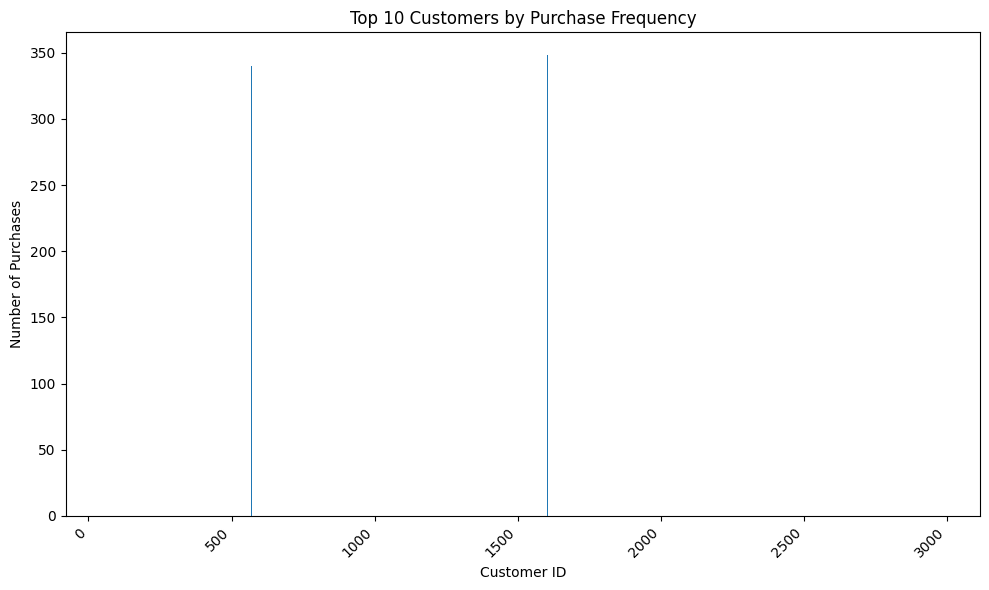

In [ ]:
# prompt: show a visualization using the dataframe showing the top ranks of large the largest buying customers by frequency

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'soda.csv' is in your current working directory
df = pd.read_csv('soda_customer_purchases.csv')

# Group by 'Customer ID' and count purchases
customer_purchase_counts = df.groupby('Customer ID')['Customer ID'].count()

# Sort by purchase counts in descending order
top_customers = customer_purchase_counts.sort_values(ascending=False)

# Get the top N customers (e.g., top 10)
top_n = 10  # Adjust as needed
top_customers = top_customers.head(top_n)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_customers.index, top_customers.values)
plt.xlabel("Customer ID")
plt.ylabel("Number of Purchases")
plt.title(f"Top {top_n} Customers by Purchase Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: what is the top-n list of products which were common to customers in this demographic

import pandas as pd

# Assuming 'soda.csv' is in your current working directory
df = pd.read_csv('soda_customer_purchases.csv')

# Group by customer and get a list of items purchased
customer_items = df.groupby('Customer ID')['Items'].apply(list)

# Find common items for all customers
from collections import Counter

def common_items(items):
    counts = Counter()
    for customer_items_list in items:
        for item in customer_items_list:
            counts[item] += 1
    return counts.most_common()

# Get the top N most frequent items across all customers in this demographic
top_n = 10 # set the number of items to return

# Calculate and print the top N most frequent products bought by customers in the dataset
top_products = common_items(customer_items)[:top_n]

print(f"Top {top_n} most frequent products purchased by customers:")
for product, count in top_products:
    print(f"{product}: {count}")

Top 10 most frequent products purchased by customers:
Coke: 2125
Mountain Dew: 2121
Fanta: 2057
Pepsi: 2053
Sprite: 1977
Sprite, Coke: 568
Sprite, Pepsi: 546
Mountain Dew, Sprite: 528
Pepsi, Coke: 527
Mountain Dew, Fanta: 526


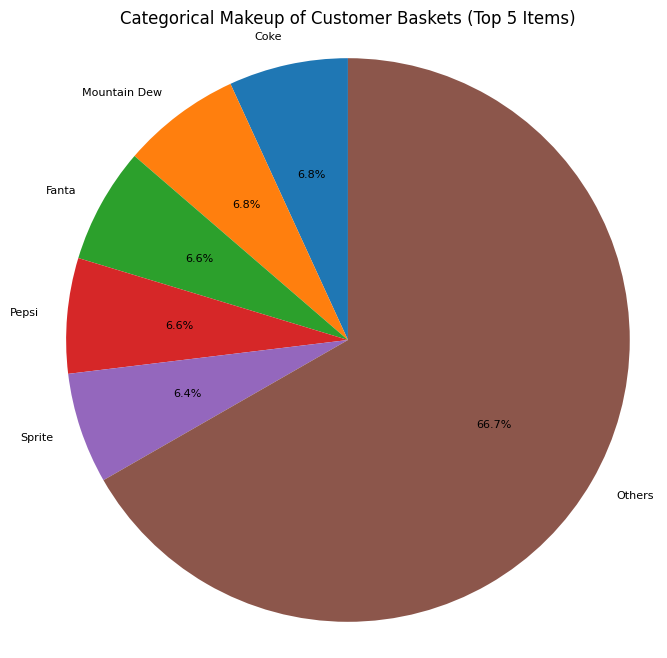

In [ ]:
# prompt: display a visualization for the above categorical makeup using a pie chart more condensed

import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'soda.csv' is in your current working directory and item_counts is defined as in your previous code
# ... (your existing code to load data and calculate item_counts)

# Create the pie chart
labels = [item for item, count in item_counts.most_common()]
sizes = [count for item, count in item_counts.most_common()]

# Condense the pie chart by only showing the top N items and grouping the rest as "Others"
top_n = 5 # Number of top items to show
if len(labels) > top_n:
    other_size = sum(sizes[top_n:])
    sizes = sizes[:top_n] + [other_size]
    labels = labels[:top_n] + ['Others']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8}) # Reduced fontsize for labels
plt.title('Categorical Makeup of Customer Baskets (Top {} Items)'.format(top_n))
plt.axis('equal')
plt.show()

In [ ]:
# prompt: what are the top 5 largest buyers overall

import pandas as pd

# Assuming 'soda.csv' is in your current working directory
df = pd.read_csv('soda_customer_purchases.csv')

# Group by 'Customer ID' and count purchases
customer_purchase_counts = df.groupby('Customer ID')['Customer ID'].count()

# Sort by purchase counts in descending order and get the top 5
top_5_customers = customer_purchase_counts.sort_values(ascending=False).head(5)

print("Top 5 largest buyers overall:")
top_5_customers

Top 5 largest buyers overall:


,Customer ID
Customer ID,
1604,348
2969,343
66,342
327,342
1454,341
